In [1]:
import pandas as pd

df = pd.read_csv("MachineLearningCVE.csv")

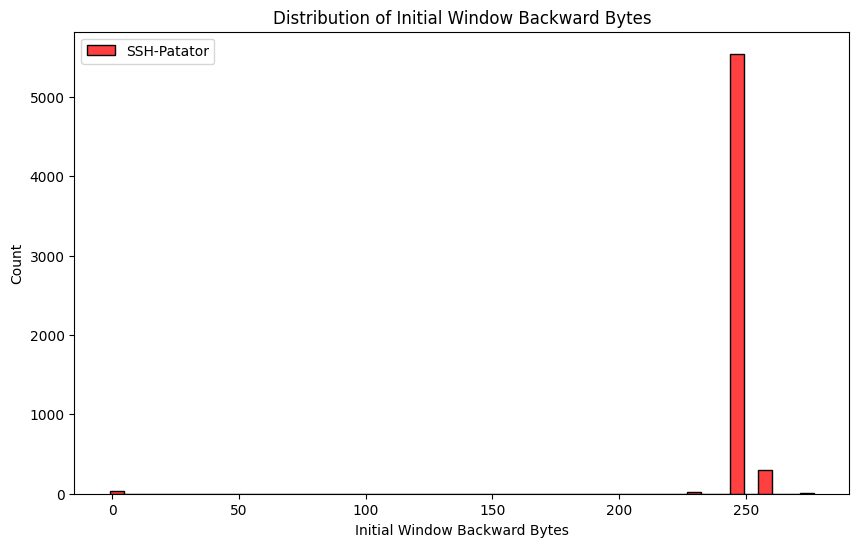

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Separate the datµ for benign and SSH-Patator connections
benign_data = df[df['Label'] == 'BENIGN']
ssh_patator_data = df[df['Label'] == 'SSH-Patator']



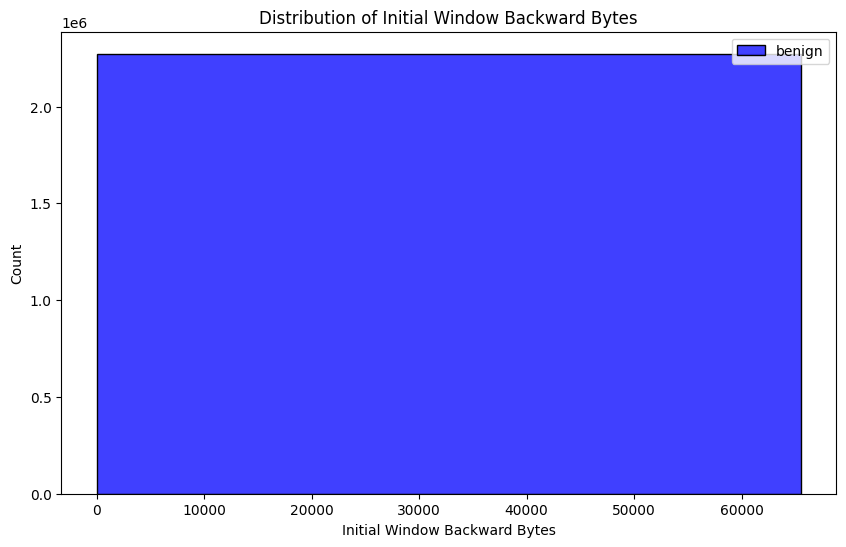

Destination Port               845095
Flow Duration                  845095
Total Fwd Packets              845095
Total Backward Packets         845095
Total Length of Fwd Packets    845095
                                ...  
Idle Mean                      845095
Idle Std                       845095
Idle Max                       845095
Idle Min                       845095
Label                          845095
Length: 79, dtype: int64

In [16]:

plt.figure(figsize=(10, 6))
sns.histplot(benign_data['Init_Win_bytes_backward'], bins=1, color='blue', label='benign')
plt.xlabel('Initial Window Backward Bytes')
plt.ylabel('Count')
plt.title('Distribution of Initial Window Backward Bytes')
plt.legend()
plt.show()

benign_data[benign_data['Init_Win_bytes_backward'] >0 ].count() 

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Separate the data for benign and SSH-Patator connections
benign_data = df[df['Label'] == 'BENIGN']
ssh_patator_data = df[df['Label'] == 'SSH-Patator']

# Combine the data for plotting
data_to_plot = [benign_data['init_win_backward_bytes'], ssh_patator_data['init_win_backward_bytes']]

# Plotting the boxplots
plt.figure(figsize=(10, 6))
plt.boxplot(data_to_plot, labels=['Benign', 'SSH-Patator'])
plt.xlabel('Class')
plt.ylabel('Initial Window Backward Bytes')
plt.title('Comparison of Initial Window Backward Bytes')
plt.show()


KeyError: 'init_win_backward_bytes'

In [27]:
df = df.drop('Init_Win_bytes_backward', axis=1)


In [28]:
labels=df.Label.unique()
columns = df.columns[:-1]




In [29]:
def initial_eda(data):
    if isinstance(data, pd.DataFrame):
        total_na = data.isna().sum().sum()
        print("Dimensions : %d rows, %d columns" % (data.shape[0], data.shape[1]))
        print("Total NA Values : %d " % (total_na))
        print("%38s %10s     %10s %10s" % ("Column Name", "Data Type", "#Distinct", "NA Values"))
        col_name = data.columns
        dtyp = data.dtypes
        uniq = data.nunique()
        na_val = data.isna().sum()
        for i in range(len(data.columns)):
            print("%38s %10s   %10s %10s" % (col_name[i], dtyp[i], uniq[i], na_val[i]))
        
    else:
        print("Expect a DataFrame but got a %15s" % (type(data)))

In [30]:
initial_eda(df)


Dimensions : 2830743 rows, 78 columns
Total NA Values : 1358 
                           Column Name  Data Type      #Distinct  NA Values
                      Destination Port      int64        53805          0
                         Flow Duration      int64      1050899          0
                     Total Fwd Packets      int64         1432          0
                Total Backward Packets      int64         1747          0
           Total Length of Fwd Packets      int64        17928          0
           Total Length of Bwd Packets      int64        64698          0
                 Fwd Packet Length Max      int64         5279          0
                 Fwd Packet Length Min      int64          384          0
                Fwd Packet Length Mean    float64        99716          0
                 Fwd Packet Length Std    float64       253909          0
                 Bwd Packet Length Max      int64         4838          0
                 Bwd Packet Length Min      int6

In [31]:

column_dict= {column : 0 for column in columns} 

for column in columns :
 count = (df[column] < 0).sum()
 column_dict[column] = count




In [32]:
column_dict

{'Destination Port': 0,
 'Flow Duration': 115,
 'Total Fwd Packets': 0,
 'Total Backward Packets': 0,
 'Total Length of Fwd Packets': 0,
 'Total Length of Bwd Packets': 0,
 'Fwd Packet Length Max': 0,
 'Fwd Packet Length Min': 0,
 'Fwd Packet Length Mean': 0,
 'Fwd Packet Length Std': 0,
 'Bwd Packet Length Max': 0,
 'Bwd Packet Length Min': 0,
 'Bwd Packet Length Mean': 0,
 'Bwd Packet Length Std': 0,
 'Flow Bytes/s': 85,
 'Flow Packets/s': 115,
 'Flow IAT Mean': 115,
 'Flow IAT Std': 0,
 'Flow IAT Max': 115,
 'Flow IAT Min': 2891,
 'Fwd IAT Total': 0,
 'Fwd IAT Mean': 0,
 'Fwd IAT Std': 0,
 'Fwd IAT Max': 0,
 'Fwd IAT Min': 17,
 'Bwd IAT Total': 0,
 'Bwd IAT Mean': 0,
 'Bwd IAT Std': 0,
 'Bwd IAT Max': 0,
 'Bwd IAT Min': 0,
 'Fwd PSH Flags': 0,
 'Bwd PSH Flags': 0,
 'Fwd URG Flags': 0,
 'Bwd URG Flags': 0,
 'Fwd Header Length': 35,
 'Bwd Header Length': 22,
 'Fwd Packets/s': 0,
 'Bwd Packets/s': 0,
 'Min Packet Length': 0,
 'Max Packet Length': 0,
 'Packet Length Mean': 0,
 'Packet L

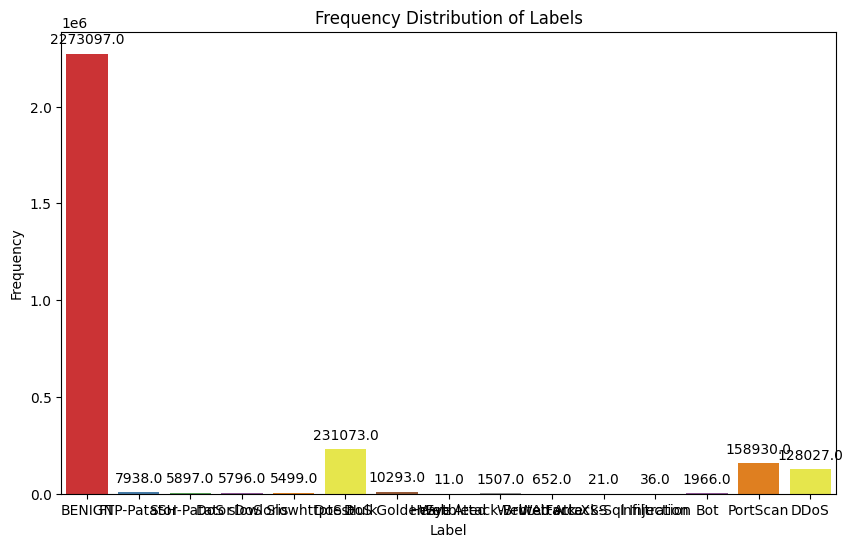

In [33]:
import seaborn as sns

import matplotlib.pyplot as plt
# Plot frequency distribution of all labels
f, ax = plt.subplots(figsize=(10, 6))
sns.countplot(x="Label", data=df, palette="Set1")

# Add labels to the bars
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f"{height}", xy=(p.get_x() + p.get_width() / 2, height),
                xytext=(0, 5), textcoords='offset points',
                ha='center', va='bottom')

# Set title and axis labels
ax.set_title("Frequency Distribution of Labels")
ax.set_xlabel("Label")
ax.set_ylabel("Frequency")

plt.show()

In [34]:
labels

array(['BENIGN', 'FTP-Patator', 'SSH-Patator', 'DoS slowloris',
       'DoS Slowhttptest', 'DoS Hulk', 'DoS GoldenEye', 'Heartbleed',
       'Web Attack-Brute Force', 'Web Attack-XSS',
       'Web Attack-Sql Injection', 'Infiltration', 'Bot', 'PortScan',
       'DDoS'], dtype=object)

In [35]:
 df = df.drop(df[df['Label'].isin(['Infiltration', 'Web Attack-Sql Injection', 'Heartbleed','Bot','Web Attack-Brute Force','Web Attack-XSS'])].index)


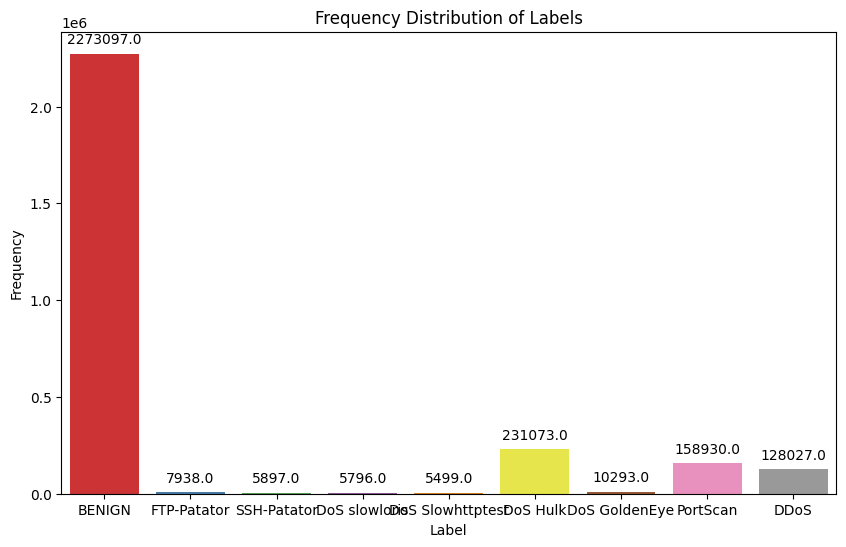

In [36]:
import seaborn as sns

import matplotlib.pyplot as plt
# Plot frequency distribution of all labels
f, ax = plt.subplots(figsize=(10, 6))
sns.countplot(x="Label", data=df, palette="Set1")

# Add labels to the bars
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f"{height}", xy=(p.get_x() + p.get_width() / 2, height),
                xytext=(0, 5), textcoords='offset points',
                ha='center', va='bottom')

# Set title and axis labels
ax.set_title("Frequency Distribution of Labels")
ax.set_xlabel("Label")
ax.set_ylabel("Frequency")

plt.show()

In [37]:
import os
import logging
logging.getLogger().setLevel(logging.INFO)
import pandas as pd
import numpy as np

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split


# Log setting
logging.basicConfig(format="%(asctime)s %(levelname)s %(message)s", datefmt="%H:%M:%S", level=logging.INFO)

# Change display.max_rows to show all features.
pd.set_option("display.max_rows", 85)

In [38]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df.Label = le.fit_transform(df.Label)




In [39]:
le.classes_

array(['BENIGN', 'DDoS', 'DoS GoldenEye', 'DoS Hulk', 'DoS Slowhttptest',
       'DoS slowloris', 'FTP-Patator', 'PortScan', 'SSH-Patator'],
      dtype=object)

In [40]:
import pandas as pd

def process_chunk(chunk):
  

    # Fill NaN with average value of each class in this dataset
    nan_rows = chunk[chunk.isna().any(axis=1)].shape[0]
    logging.info("Fill NaN in {} rows with average value of each class.".format(nan_rows))
    chunk.iloc[:, chunk.columns != "Label"] = chunk.groupby("Label").transform(lambda x: x.fillna(x.mean()))
    # Temporary replace inf with NaN
    chunk = chunk.replace([np.inf], np.nan)
    # Replace inf with maximum value of each class in this dataset
    chunk.iloc[:, chunk.columns != "Label"] = chunk.groupby("Label").transform(lambda x: x.fillna(x.max()))

    # Change negative value with minimum positive value of each class
    logging.info("Replace negative values with minimum value of each class.")
    # Temporary replace negative value with NaN
    chunk[chunk < 0] = np.nan
    # Replace negative value with minimum value of each class in this dataset
    chunk.iloc[:, chunk.columns != "Label"] = chunk.groupby("Label").transform(lambda x: x.fillna(x.min()))

    return chunk

# Set chunksize to read the dataset in chunks
chunksize = 100000
new_df = pd.DataFrame()

# Loop through the dataset in chunks
for i in range(0, len(df), chunksize):
    chunk = df.iloc[i:i+chunksize, :]    # Process each chunk using the function
    processed_chunk = process_chunk(chunk)
    chunk = chunk[(chunk.astype(float) <= 3.4028235e38).all(axis=1)]
    print(chunk.Label.unique())
    new_df = pd.concat([new_df, chunk])

new_df.Label.unique()


11:15:54 INFO Fill NaN in 16 rows with average value of each class.
C:\Users\ASUS\AppData\Local\Temp\ipykernel_19128\3911524785.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk.iloc[:, chunk.columns != "Label"] = chunk.groupby("Label").transform(lambda x: x.fillna(x.mean()))
11:15:55 INFO Replace negative values with minimum value of each class.
11:15:55 INFO Fill NaN in 12 rows with average value of each class.


[0]


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19128\3911524785.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk.iloc[:, chunk.columns != "Label"] = chunk.groupby("Label").transform(lambda x: x.fillna(x.mean()))
11:15:56 INFO Replace negative values with minimum value of each class.
11:15:56 INFO Fill NaN in 8 rows with average value of each class.


[0]


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19128\3911524785.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk.iloc[:, chunk.columns != "Label"] = chunk.groupby("Label").transform(lambda x: x.fillna(x.mean()))
11:15:56 INFO Replace negative values with minimum value of each class.
11:15:57 INFO Fill NaN in 11 rows with average value of each class.


[0]


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19128\3911524785.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk.iloc[:, chunk.columns != "Label"] = chunk.groupby("Label").transform(lambda x: x.fillna(x.mean()))
11:15:57 INFO Replace negative values with minimum value of each class.
11:15:58 INFO Fill NaN in 15 rows with average value of each class.


[0]


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19128\3911524785.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk.iloc[:, chunk.columns != "Label"] = chunk.groupby("Label").transform(lambda x: x.fillna(x.mean()))
11:15:58 INFO Replace negative values with minimum value of each class.
11:15:59 INFO Fill NaN in 37 rows with average value of each class.


[0]


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19128\3911524785.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk.iloc[:, chunk.columns != "Label"] = chunk.groupby("Label").transform(lambda x: x.fillna(x.mean()))
11:16:00 INFO Replace negative values with minimum value of each class.
11:16:01 INFO Fill NaN in 40 rows with average value of each class.


[0 6]


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19128\3911524785.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk.iloc[:, chunk.columns != "Label"] = chunk.groupby("Label").transform(lambda x: x.fillna(x.mean()))
11:16:02 INFO Replace negative values with minimum value of each class.
11:16:03 INFO Fill NaN in 37 rows with average value of each class.


[0 6 8]


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19128\3911524785.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk.iloc[:, chunk.columns != "Label"] = chunk.groupby("Label").transform(lambda x: x.fillna(x.mean()))
11:16:05 INFO Replace negative values with minimum value of each class.
11:16:05 INFO Fill NaN in 54 rows with average value of each class.


[0 8]


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19128\3911524785.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk.iloc[:, chunk.columns != "Label"] = chunk.groupby("Label").transform(lambda x: x.fillna(x.mean()))
11:16:07 INFO Replace negative values with minimum value of each class.
11:16:08 INFO Fill NaN in 40 rows with average value of each class.


[0 8]


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19128\3911524785.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk.iloc[:, chunk.columns != "Label"] = chunk.groupby("Label").transform(lambda x: x.fillna(x.mean()))
11:16:09 INFO Replace negative values with minimum value of each class.
11:16:10 INFO Fill NaN in 134 rows with average value of each class.


[0 8 5]


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19128\3911524785.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk.iloc[:, chunk.columns != "Label"] = chunk.groupby("Label").transform(lambda x: x.fillna(x.mean()))
11:16:11 INFO Replace negative values with minimum value of each class.
11:16:12 INFO Fill NaN in 417 rows with average value of each class.


[0 5 4 3]


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19128\3911524785.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk.iloc[:, chunk.columns != "Label"] = chunk.groupby("Label").transform(lambda x: x.fillna(x.mean()))
11:16:13 INFO Replace negative values with minimum value of each class.
11:16:14 INFO Fill NaN in 404 rows with average value of each class.


[3 0]


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19128\3911524785.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk.iloc[:, chunk.columns != "Label"] = chunk.groupby("Label").transform(lambda x: x.fillna(x.mean()))
11:16:15 INFO Replace negative values with minimum value of each class.


[3 0]


11:16:16 INFO Fill NaN in 27 rows with average value of each class.
C:\Users\ASUS\AppData\Local\Temp\ipykernel_19128\3911524785.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk.iloc[:, chunk.columns != "Label"] = chunk.groupby("Label").transform(lambda x: x.fillna(x.mean()))
11:16:18 INFO Replace negative values with minimum value of each class.
11:16:19 INFO Fill NaN in 11 rows with average value of each class.


[3 0 2]


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19128\3911524785.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk.iloc[:, chunk.columns != "Label"] = chunk.groupby("Label").transform(lambda x: x.fillna(x.mean()))
11:16:20 INFO Replace negative values with minimum value of each class.


[0 2]


11:16:21 INFO Fill NaN in 6 rows with average value of each class.
C:\Users\ASUS\AppData\Local\Temp\ipykernel_19128\3911524785.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk.iloc[:, chunk.columns != "Label"] = chunk.groupby("Label").transform(lambda x: x.fillna(x.mean()))
11:16:22 INFO Replace negative values with minimum value of each class.


[0 2]


11:16:23 INFO Fill NaN in 8 rows with average value of each class.
C:\Users\ASUS\AppData\Local\Temp\ipykernel_19128\3911524785.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk.iloc[:, chunk.columns != "Label"] = chunk.groupby("Label").transform(lambda x: x.fillna(x.mean()))
11:16:24 INFO Replace negative values with minimum value of each class.


[0 2]


11:16:25 INFO Fill NaN in 11 rows with average value of each class.
C:\Users\ASUS\AppData\Local\Temp\ipykernel_19128\3911524785.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk.iloc[:, chunk.columns != "Label"] = chunk.groupby("Label").transform(lambda x: x.fillna(x.mean()))
11:16:26 INFO Replace negative values with minimum value of each class.


[0]


11:16:26 INFO Fill NaN in 7 rows with average value of each class.
C:\Users\ASUS\AppData\Local\Temp\ipykernel_19128\3911524785.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk.iloc[:, chunk.columns != "Label"] = chunk.groupby("Label").transform(lambda x: x.fillna(x.mean()))
11:16:27 INFO Replace negative values with minimum value of each class.


[0]


11:16:28 INFO Fill NaN in 11 rows with average value of each class.
C:\Users\ASUS\AppData\Local\Temp\ipykernel_19128\3911524785.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk.iloc[:, chunk.columns != "Label"] = chunk.groupby("Label").transform(lambda x: x.fillna(x.mean()))
11:16:28 INFO Replace negative values with minimum value of each class.


[0]


11:16:29 INFO Fill NaN in 5 rows with average value of each class.
C:\Users\ASUS\AppData\Local\Temp\ipykernel_19128\3911524785.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk.iloc[:, chunk.columns != "Label"] = chunk.groupby("Label").transform(lambda x: x.fillna(x.mean()))
11:16:29 INFO Replace negative values with minimum value of each class.


[0]


11:16:30 INFO Fill NaN in 12 rows with average value of each class.
C:\Users\ASUS\AppData\Local\Temp\ipykernel_19128\3911524785.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk.iloc[:, chunk.columns != "Label"] = chunk.groupby("Label").transform(lambda x: x.fillna(x.mean()))
11:16:30 INFO Replace negative values with minimum value of each class.


[0]


11:16:31 INFO Fill NaN in 14 rows with average value of each class.
C:\Users\ASUS\AppData\Local\Temp\ipykernel_19128\3911524785.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk.iloc[:, chunk.columns != "Label"] = chunk.groupby("Label").transform(lambda x: x.fillna(x.mean()))
11:16:31 INFO Replace negative values with minimum value of each class.


[0]


11:16:32 INFO Fill NaN in 10 rows with average value of each class.
C:\Users\ASUS\AppData\Local\Temp\ipykernel_19128\3911524785.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk.iloc[:, chunk.columns != "Label"] = chunk.groupby("Label").transform(lambda x: x.fillna(x.mean()))
11:16:33 INFO Replace negative values with minimum value of each class.


[0 7]


11:16:34 INFO Fill NaN in 0 rows with average value of each class.
C:\Users\ASUS\AppData\Local\Temp\ipykernel_19128\3911524785.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk.iloc[:, chunk.columns != "Label"] = chunk.groupby("Label").transform(lambda x: x.fillna(x.mean()))
11:16:35 INFO Replace negative values with minimum value of each class.


[0 7]


11:16:36 INFO Fill NaN in 7 rows with average value of each class.
C:\Users\ASUS\AppData\Local\Temp\ipykernel_19128\3911524785.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk.iloc[:, chunk.columns != "Label"] = chunk.groupby("Label").transform(lambda x: x.fillna(x.mean()))
11:16:37 INFO Replace negative values with minimum value of each class.


[7 0]


11:16:38 INFO Fill NaN in 3 rows with average value of each class.
C:\Users\ASUS\AppData\Local\Temp\ipykernel_19128\3911524785.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk.iloc[:, chunk.columns != "Label"] = chunk.groupby("Label").transform(lambda x: x.fillna(x.mean()))
11:16:40 INFO Replace negative values with minimum value of each class.


[0 1]


11:16:41 INFO Fill NaN in 0 rows with average value of each class.
C:\Users\ASUS\AppData\Local\Temp\ipykernel_19128\3911524785.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk.iloc[:, chunk.columns != "Label"] = chunk.groupby("Label").transform(lambda x: x.fillna(x.mean()))
11:16:42 INFO Replace negative values with minimum value of each class.


[1 0]


11:16:43 INFO Fill NaN in 1 rows with average value of each class.
C:\Users\ASUS\AppData\Local\Temp\ipykernel_19128\3911524785.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk.iloc[:, chunk.columns != "Label"] = chunk.groupby("Label").transform(lambda x: x.fillna(x.mean()))
11:16:44 INFO Replace negative values with minimum value of each class.


[0]


array([0, 6, 8, 5, 4, 3, 2, 7, 1])

In [41]:
logging.info("Class distribution\n{}".format(new_df.Label.value_counts()))

11:16:44 INFO Class distribution
0    2271320
3     230124
7     158804
1     128025
2      10293
6       7935
8       5897
5       5796
4       5499
Name: Label, dtype: int64


In [42]:
import pandas as pd


# Separate the benign traffic data
benign_data = new_df[new_df['Label'] == 0]

# Calculate the desired number of benign samples to keep (e.g., 10% of the original benign traffic)
desired_benign_samples = int(len(benign_data) * 0.11)

# Randomly sample the desired number of benign samples
sampled_benign_data = benign_data.sample(n=desired_benign_samples, random_state=42)

# Combine the sampled benign data with the non-benign data
filtered_dataset = pd.concat([sampled_benign_data, new_df[new_df['Label'] != 0]])

# Reset the index of the DataFrame
filtered_dataset.reset_index(drop=True, inplace=True)

# Save the filtered dataset to a new CSV file
filtered_dataset.to_csv('filtred_dataset_with_more_classes_to_test.csv', index=False)